<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Regressão
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever o peso do penguin (**body_mass_g**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
penguim = sns.load_dataset('penguins')

In [3]:
penguim.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos por sexo:

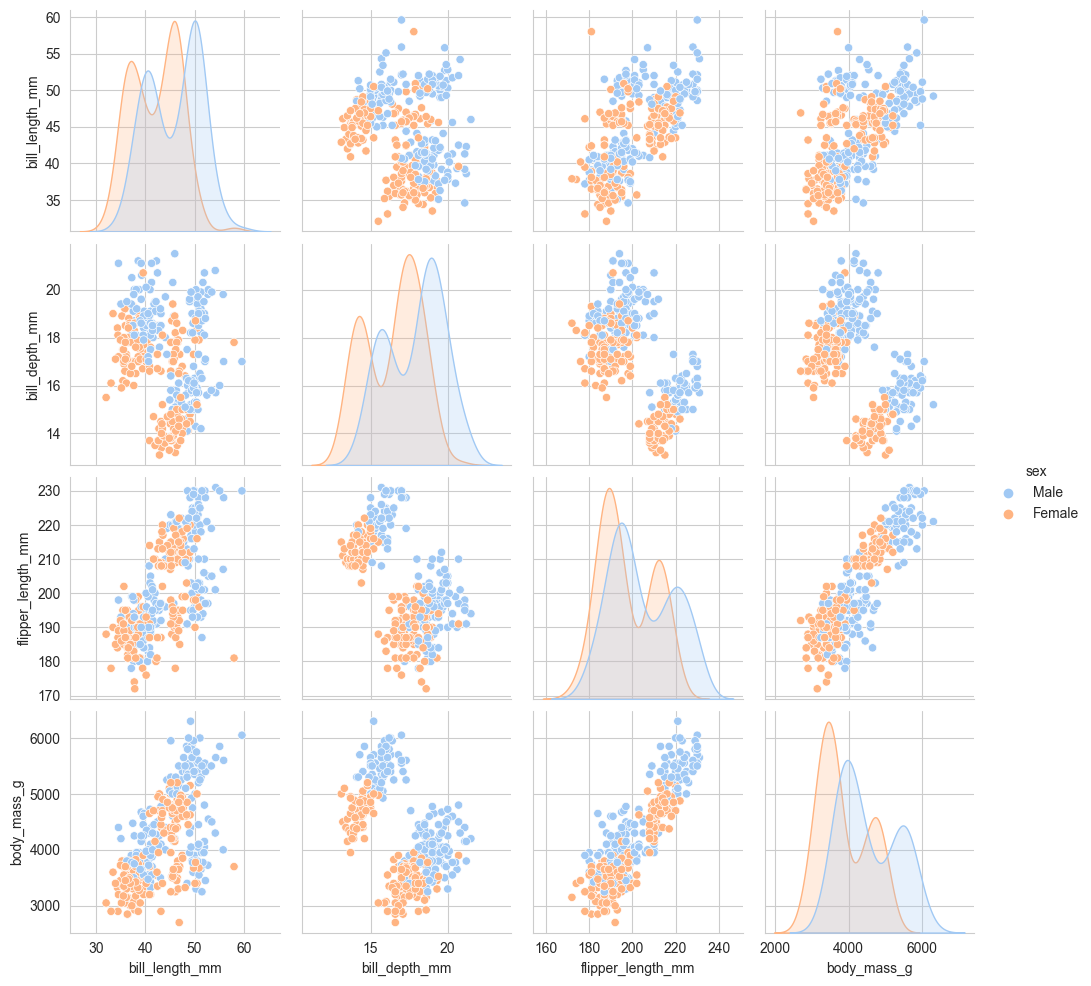

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="sex", palette="pastel")

**Comentário:** Os penguins machos são maiores e mais pesados que as fêmeas.

 - Atributos por espécie:

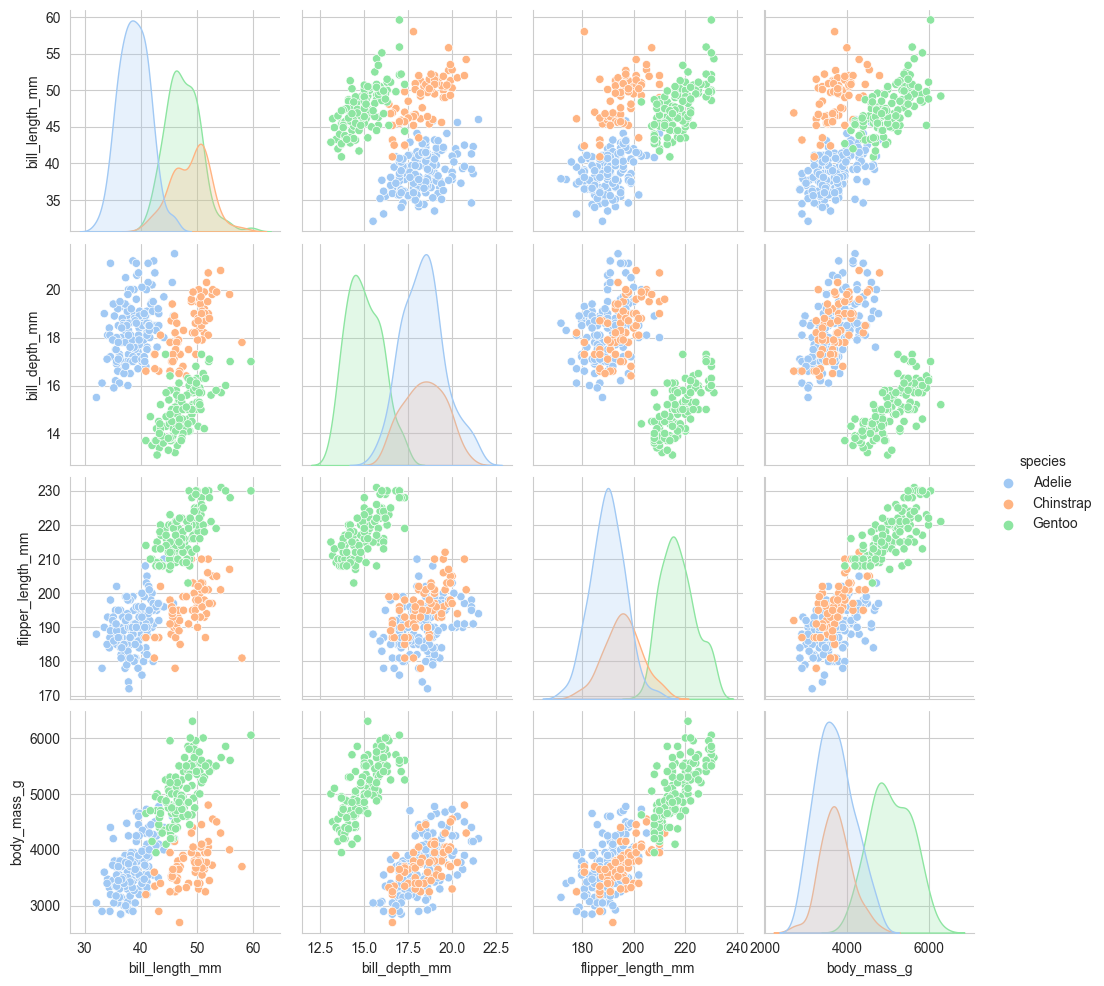

In [5]:
 with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="species", palette="pastel")

**Comentário:** É possível ver que há diferenças significativas entre as espécies de pinguins em relação aos tamanhos, exceto ao peso e as nadadeiras que aparentam ter uma correlação positiva. A espécie gento possui a maior massa, já as outras duas tem caracteristicas próximas.

 - Atributos por ilha:

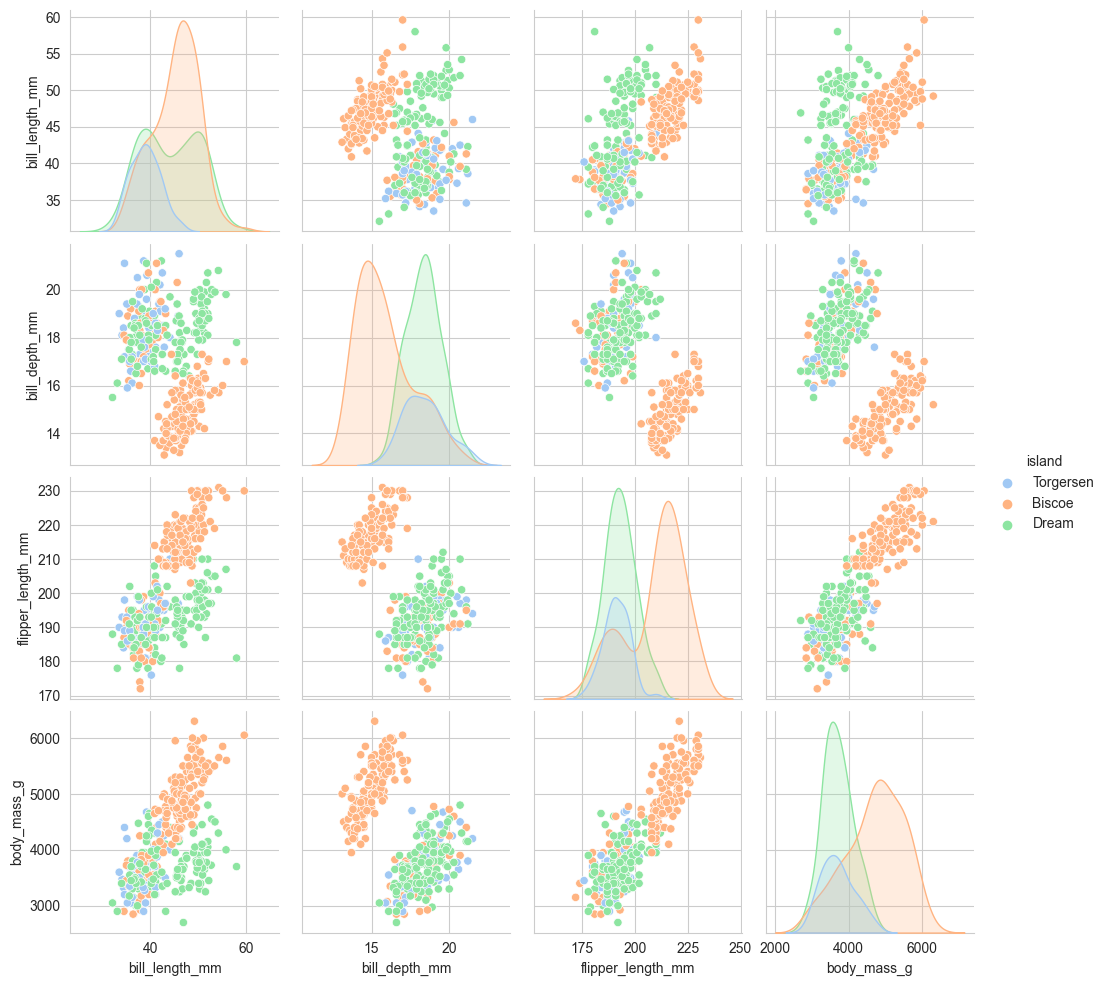

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim, hue="island", palette="pastel")

**Comentário:** Os penguins da ilha de Biscoe parecem ser boa parte da espécie de Gentoo. Já as outras duas espécies estão mais distribuidas nas ilhas restantes

## 2\. Dados 

### **2.1. Valores nulos** 

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [7]:
data = pd.DataFrame(penguim.dropna())
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### **2.2. Variáveis numéricas** 

Identifique as variáveis numéricas e crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [8]:
data['bill_length_mm_std'] = data['bill_length_mm'].apply(lambda x: (x - data['bill_length_mm'].mean()) / data['bill_length_mm'].std())
data['bill_depth_mm_std'] = data['bill_depth_mm'].apply(lambda x: (x - data['bill_depth_mm'].mean()) / data['bill_depth_mm'].std())
data['flipper_length_mm_std'] = data['flipper_length_mm'].apply(lambda x: (x - data['flipper_length_mm'].mean()) / data['flipper_length_mm'].std())
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.894695,0.779559,-1.424608
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.821552,0.119404,-1.067867
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.675264,0.424091,-0.425733
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.333559,1.084246,-0.568429
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.858123,1.744400,-0.782474


### **2.3. Variáveis categóricas** 

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

In [9]:
data['sex_m'] = data['sex'].apply(lambda sex: 1 if sex == 'Male' else 0)
data['sex_f'] = data['sex'].apply(lambda sex: 1 if sex == 'Female' else 0)

data['island_torgersen'] = data['island'].apply(lambda island: 1 if island == 'Torgersen' else 0)
data['island_biscoe'] = data['island'].apply(lambda island: 1 if island == 'Biscoe' else 0)
data['island_dream'] = data['island'].apply(lambda island: 1 if island == 'Dream' else 0)
data['specie_adelie'] = data['species'].apply(lambda specie: 1 if specie == 'Adelie' else 0)
data['specie_chinstrap'] = data['species'].apply(lambda specie: 1 if specie == 'Chinstrap' else 0)
data['specie_gentoo'] = data['species'].apply(lambda specie: 1 if specie == 'Gentoo' else 0)

data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m,sex_f,island_torgersen,island_biscoe,island_dream,specie_adelie,specie_chinstrap,specie_gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,-0.894695,0.779559,-1.424608,1,0,1,0,0,1,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,-0.821552,0.119404,-1.067867,0,1,1,0,0,1,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,-0.675264,0.424091,-0.425733,0,1,1,0,0,1,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-1.333559,1.084246,-0.568429,0,1,1,0,0,1,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,-0.858123,1.744400,-0.782474,1,0,1,0,0,1,0,0


### **2.4. Limpeza** 

Descarte as colunas originais e mantenha apenas a variável resposta e as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [10]:
data2 = data.drop(data.columns[[0,1,2,3,4,6]], axis=1)
data2.head()

,body_mass_g,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m,sex_f,island_torgersen,island_biscoe,island_dream,specie_adelie,specie_chinstrap,specie_gentoo
0,3750.0,-0.894695,0.779559,-1.424608,1,0,1,0,0,1,0,0
1,3800.0,-0.821552,0.119404,-1.067867,0,1,1,0,0,1,0,0
2,3250.0,-0.675264,0.424091,-0.425733,0,1,1,0,0,1,0,0
4,3450.0,-1.333559,1.084246,-0.568429,0,1,1,0,0,1,0,0
5,3650.0,-0.858123,1.744400,-0.782474,1,0,1,0,0,1,0,0


### **2.5. Treino/Teste** 

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes. 

In [11]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data2.drop(['body_mass_g'], axis=1),
    data2['body_mass_g'],
    test_size=0.25,
    random_state=123
)

## 3\. Modelagem 

### **3.1. Treino**

Treine um modelo de **regressão linear** com os **dados de treino** (2/3).

In [12]:
model = LinearRegression()
model = model.fit(predictors_train.values, target_train.values)

In [13]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 11,
 'coef_': array([ 128.95017535,  159.25487577,  248.88232459,  167.56297759,
        -167.56297759,  -67.62760481,   20.19006002,   47.43754479,
        -203.01893742, -542.74713653,  745.76607395]),
 'rank_': 8,
 'singular_': array([2.53146876e+01, 1.62653260e+01, 1.16263240e+01, 6.26699417e+00,
        6.14514791e+00, 5.47018227e+00, 3.38493683e+00, 2.23187841e+00,
        1.23689455e-15, 1.16829056e-15, 1.00927743e-15]),
 'intercept_': 4110.766411860845}

### **3.2. Avaliação** 

Calcule o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui um RMSE de approx. 296g, 7% da média do peso, uma performance razoável (seu RMSE pode não ser igual).

In [14]:
target_predicted = model.predict(predictors_test.values)
rmse_v2 = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse_v2)

306.373396434045


## 4\. Predição  

### **4.1. Novo penguim** 

Qual o peso de um penguim com as seguintes características:


| species	| island | bill_length_mm | bill_depth_mm | flipper_length_mm | sex |
| --- | --- | --- | --- | --- | --- |
| Adelie | Biscoe | 38.2 | 18.1 | 185.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2 e 2.3

> **Nota:** Como referência eu obtive um peso predito de 3786.16g (a sua predição pode não ser igual).

In [15]:
data2.head(1)

,body_mass_g,bill_length_mm_std,bill_depth_mm_std,flipper_length_mm_std,sex_m,sex_f,island_torgersen,island_biscoe,island_dream,specie_adelie,specie_chinstrap,specie_gentoo
0,3750.0,-0.894695,0.779559,-1.424608,1,0,1,0,0,1,0,0


In [16]:
blm_std = (38.2 - data['bill_length_mm'].mean()) / data['bill_length_mm'].std()
bdm_std = (18.2 - data['bill_depth_mm'].mean()) / data['bill_depth_mm'].std()
flm_std = (185.0 - data['flipper_length_mm'].mean()) / data['flipper_length_mm'].std()

penguim_novo = np.array([blm_std, bdm_std, flm_std, 1, 0, 0, 1, 0, 1, 0, 0])

peso = model.predict(penguim_novo.reshape(1, -1))
print(peso)

[3759.08997249]


---